In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stock = 'NFLX'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [19]:
price = data['Close']
price

Date
2010-01-04      7.640000
2010-01-05      7.358571
2010-01-06      7.617143
2010-01-07      7.485714
2010-01-08      7.614286
                 ...    
2023-05-12    339.890015
2023-05-15    335.890015
2023-05-16    333.750000
2023-05-17    339.959991
2023-05-18    371.290009
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

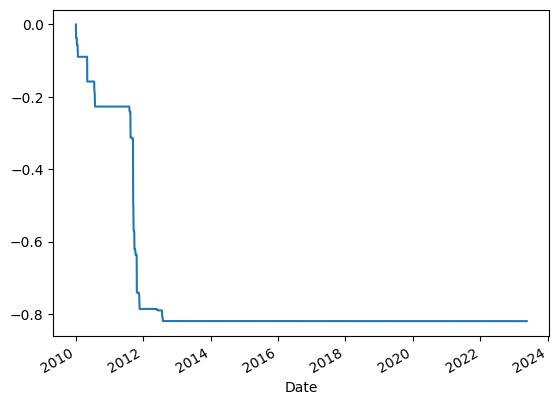

In [20]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [21]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -81.99042663290899 %


In [22]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.03683623,  0.0351389 , ..., -0.00637118,
        0.01860672,  0.09215795])

In [23]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([ 1.        ,  0.96316377,  0.99700828, ..., 43.68455574,
       44.49738186, 48.59816951])

In [24]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 4859.816950699968%


In [25]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.605635
2012-12-31    0.336268
2013-12-31    2.976347
2014-12-31   -0.072141
2015-12-31    1.343784
2016-12-31    0.082357
2017-12-31    0.550565
2018-12-31    0.394353
2019-12-31    0.208884
2020-12-31    0.671138
2021-12-31    0.114124
2022-12-31   -0.510524
2023-12-31    0.259122
Freq: A-DEC, Name: Close, dtype: float64

In [26]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.061044
2010-03-31    0.116427
2010-04-30    0.341199
2010-05-31    0.123862
                ...   
2023-01-31    0.200013
2023-02-28   -0.089668
2023-03-31    0.072486
2023-04-30   -0.045010
2023-05-31    0.125360
Freq: M, Name: Close, Length: 161, dtype: float64

In [27]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 44.22033247837788%


In [28]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 24.04976266226084


In [29]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-06-30   -0.022492
2010-07-31   -0.056144
2010-12-31   -0.146673
2011-02-28   -0.034613
2011-04-30   -0.021490
                ...   
2022-06-30   -0.114313
2022-08-31   -0.005958
2022-12-31   -0.034857
2023-02-28   -0.089668
2023-04-30   -0.045010
Name: Close, Length: 62, dtype: float64

In [30]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 38.25481571920359
